In [1]:
import numpy as np
import scipy.stats as sps
from glob import glob
import matplotlib.pyplot as plt
import uproot as ur
import ROOT as rt
import ROOT.RooFit as rf
from scipy.special import erf
import sys
sys.path.append('../lib')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, SetMaxToMaxHist, make_ratio_plot
from cebefo_style import Set_2D_colz_graphics
from progressBar import ProgressBar

from analysis_utilities import drawOnCMSCanvas, extarct, extarct_multiple, createSel

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.10/08


In [2]:
import operator
ops = {'>': operator.gt, '<': operator.lt, }

In [3]:
rt.gErrorIgnoreLevel = rt.kError
rt.RooMsgService.instance().setGlobalKillBelow(rt.RooFit.ERROR)

In [4]:
m_D0 = 1.86483 #1e-3*Particle.from_string('D0').mass
print m_D0
m_Dst = 2.01026 #1e-3*Particle.from_string('D*+').mass
print m_Dst
m_B0 = 5.27963 #1e-3*Particle.from_string('B0').mass
print m_B0
m_pi = 0.13957018 #1e-3*Particle.from_string('pi+').mass
print 'mD* - mD0 =', m_Dst - m_D0

1.86483
2.01026
5.27963
mD* - mD0 = 0.14543


In [5]:
cl = rt.TLine()
cl.SetLineColor(6)
cl.SetLineStyle(9)
cl.SetLineWidth(2)

In [6]:
directory = '../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU20_10-2-3/job_B02DstMu'
tMC = ur.open(directory + '/out_CAND_0.root')['outA']['Tevts']
# print tMC.keys(), '\n\n'
branches = tMC.keys()
for b in np.sort(branches):
#     pass
    print b
    
"""
    # branches = [
    # #             'LumiBlock', 
    # #             'MC_B_P', 
    # #             'MC_B_eta', 
    # #             'MC_B_phi',
    # #             'MC_B_pt', 
    # #             'MC_D0_P', 
    # #             'MC_D0_eta', 
    # #             'MC_D0_phi', 
    # #             'MC_D0_pt',
    # #             'MC_Dst_P', 
    # #             'MC_Dst_eta',
    # #             'MC_Dst_phi',
    # #             'MC_Dst_pt',
    #             'MC_Ks_P',
    #             'MC_Ks_eta',
    #             'MC_Ks_phi',
    #             'MC_Ks_pt',
    # #             'MC_pis_P',
    # #             'MC_pis_eta',
    # #             'MC_pis_phi',
    # #             'MC_pis_pt',
    # #             'Run',
    # #             'eventNumber',
    #             'n_B',
    # #             'n_D0',
    #             'n_Dst',
    # #             'n_K',
    #             'n_Ks',
    # #             'n_pi',
    # #             'n_pis',
    #             'trgMu_charge',
    #             'trgMu_eta',
    #             'trgMu_phi',
    #             'trgMu_pt',
    #             'B_E',
    #             'B_P',
    #             'B_eta',
    #             'B_phi',
    #             'B_pt',
    #             'B_pz',
    # #             'D0_E',
    # #             'D0_P',
    # #             'D0_eta',
    # #             'D0_phi',
    # #             'D0_pt',
    # #             'D0_pz',
    #             'Dst_E',
    #             'Dst_P',
    #             'Dst_eta',
    #             'Dst_phi',
    #             'Dst_pt',
    #             'Dst_pz',
    # #             'K_E',
    # #             'K_P',
    # #             'K_eta',
    # #             'K_phi',
    # #             'K_pt',
    # #             'K_pz',
    #             'Ks_E',
    #             'Ks_P',
    #             'Ks_eta',
    #             'Ks_phi',
    #             'Ks_pt',
    #             'Ks_pz',
    # #             'chi2_D0pis',
    #             'chi2_DstK',
    # #             'chi2_kpi',
    # #             'cos_D0pis_vtxMu',
    #             'cos_DstK_vtxBest',
    # #             'cos_kpi_vtxMu',
    # #             'd_vtxD0pis_vtxMu',
    # #             'd_vtxkpi_vtxMu',
    # #             'dca_D0pis_vtxMu',
    # #             'dca_kpi_vtxMu',
    #             'mass_D0pis',
    #             'mass_DstK',
    # #             'mass_kpi',
    # #             'pi_E',
    # #             'pi_P',
    # #             'pi_eta',
    # #             'pi_phi',
    # #             'pi_pt',
    # #             'pi_pz',
    # #             'pis_E',
    # #             'pis_P',
    # #             'pis_eta',
    # #             'pis_phi',
    # #             'pis_pt',
    # #             'pis_pz',
    # #             'sigd_vtxD0pis_vtxMu',
    # #             'sigd_vtxkpi_vtxMu',
    # #             'sigdca_D0pis_vtxMu',
    # #             'sigdca_kpi_vtxMu'
    # ]
"""

B_E
B_P
B_eta
B_phi
B_pt
B_pz
D0_E
D0_P
D0_eta
D0_phi
D0_pt
D0_pz
Dst_E
Dst_P
Dst_eta
Dst_phi
Dst_pt
Dst_pz
Est_mu
K_E
K_P
K_eta
K_phi
K_pt
K_pz
LumiBlock
M2_miss
MC_B_P
MC_B_eta
MC_B_phi
MC_B_pt
MC_D0_P
MC_D0_eta
MC_D0_phi
MC_D0_pt
MC_Dst_P
MC_Dst_eta
MC_Dst_phi
MC_Dst_pt
MC_Est_mu
MC_M2_miss
MC_mu_P
MC_mu_eta
MC_mu_phi
MC_mu_pt
MC_pis_P
MC_pis_eta
MC_pis_phi
MC_pis_pt
MC_q2
Run
chi2_D0pis
chi2_Kpi
chi2_MuDst
cos_D0pis_vtxMu
cos_Kpi_vtxMu
cos_MuDst_vtxBest
d_vtxD0pis_vtxMu
d_vtxKpi_vtxMu
dca_D0pis_vtxMu
dca_Kpi_vtxMu
eventNumber
mass_D0pis
mass_Kpi
mass_MuDst
mu_E
mu_P
mu_eta
mu_phi
mu_pt
mu_pz
n_B
n_D0
n_Dst
n_K
n_pi
n_pis
pi_E
pi_P
pi_eta
pi_phi
pi_pt
pi_pz
pis_E
pis_P
pis_eta
pis_phi
pis_pt
pis_pz
q2
sigd_vtxD0pis_vtxMu
sigd_vtxKpi_vtxMu
sigdca_D0pis_vtxMu
sigdca_Kpi_vtxMu
trgMu_charge
trgMu_dxy
trgMu_dz
trgMu_eta
trgMu_phi
trgMu_pt
trgMu_sigdxy
trgMuon_match_BMuon
wh_CLNCentral
wh_CLNR0Down
wh_CLNR0Up
wh_CLNR1Down
wh_CLNR1Up
wh_CLNR2Down
wh_CLNR2Up
wh_CLNRhoSqDown
wh_CLNRhoSqUp


"\n    # branches = [\n    # #             'LumiBlock', \n    # #             'MC_B_P', \n    # #             'MC_B_eta', \n    # #             'MC_B_phi',\n    # #             'MC_B_pt', \n    # #             'MC_D0_P', \n    # #             'MC_D0_eta', \n    # #             'MC_D0_phi', \n    # #             'MC_D0_pt',\n    # #             'MC_Dst_P', \n    # #             'MC_Dst_eta',\n    # #             'MC_Dst_phi',\n    # #             'MC_Dst_pt',\n    #             'MC_Ks_P',\n    #             'MC_Ks_eta',\n    #             'MC_Ks_phi',\n    #             'MC_Ks_pt',\n    # #             'MC_pis_P',\n    # #             'MC_pis_eta',\n    # #             'MC_pis_phi',\n    # #             'MC_pis_pt',\n    # #             'Run',\n    # #             'eventNumber',\n    #             'n_B',\n    # #             'n_D0',\n    #             'n_Dst',\n    # #             'n_K',\n    #             'n_Ks',\n    # #             'n_pi',\n    # #             'n_pis',\n    #        

# Preliminary study

In [7]:
tChain = rt.TChain('outA/Tevts')
for fname in glob(directory + '/out_CAND_*[0-9].root'):
    tChain.Add(fname)
print 'N files:', tChain.GetNtrees()
print 'N events:', tChain.GetEntries()

N files: 11
N events: 23494


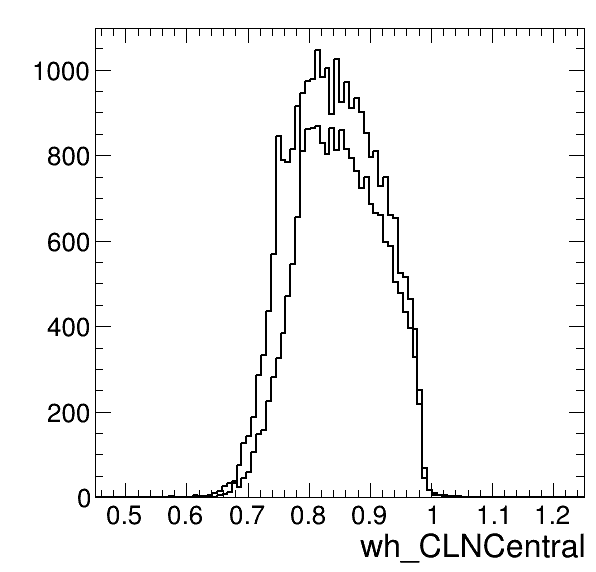

In [8]:
c = rt.TCanvas()
tChain.Draw('wh_CLNCentral')
tChain.Draw('wh_CLNR2Up', '', 'same')
c.Draw()

# Load data

In [9]:
fn = directory + '/out*.root'
dMC = extarct_multiple(fn, branches=branches)
print 'Number of events:', dMC['n_B'].shape[0]
print 'Number of candidates:', dMC['mass_Kpi'].shape[0]

Number of events: 23494
Number of candidates: 23547


# Cuts declaration

In [10]:
analysis_selection = {
'mass_MuDst'      : ['<', 5.280],
'cos_MuDst_vtxBest' : ['>', 0.98]
}

In [11]:
def createSel(d, cut):
    sel = np.ones_like(d[cut.keys()[0]], dtype=bool)
    for k, v in cut.iteritems():
        sel = np.logical_and(sel, ops[v[0]](d[k], v[1]) )
    return sel

# Studing the effect of Hammer reweights

In [55]:
an_sel = createSel(dMC, analysis_selection)

binning = {
    'q2'      : [20, -2, 10.7],
    'M2_miss' : [40/2, -5, 10],
    'Est_mu'  : [30/2, 0.10, 2.500]
}

varTitle = {
    'q2'      : 'q^{2}',
    'M2_miss' : 'm^{2}_{miss}',
    'Est_mu'  : 'E_{#mu}*'
}

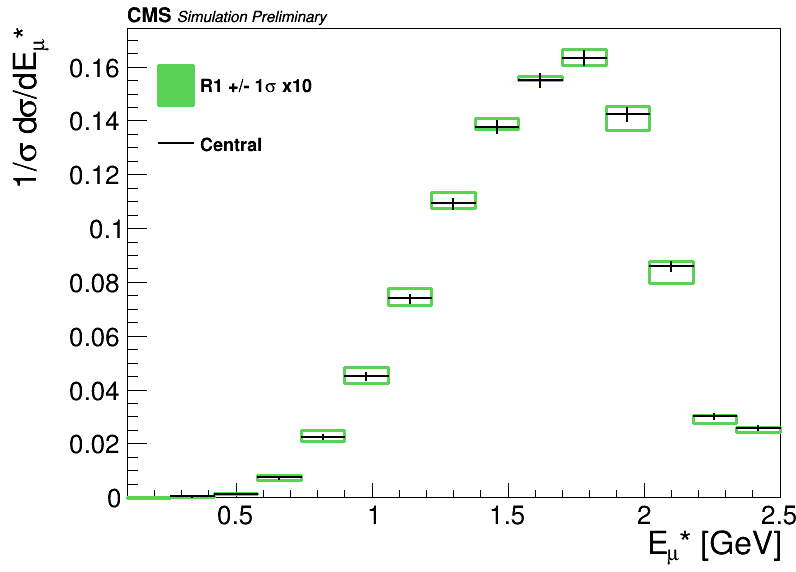

In [56]:
# for par_name in ['R0', 'R1', 'R2', 'RhoSq']:
par_name = 'R1'
for var in ['Est_mu']:

    h = create_TH1D(dMC[var][an_sel], 
                    axis_title=[varTitle[var]+' [GeV]', '1/#sigma d#sigma/d'+varTitle[var]],
                    binning=binning[var],
                    opt='overflow+undeflow',
                    weights=np.repeat(dMC['wh_CLNCentral'], dMC['n_B'].astype(np.int))[an_sel]
                   )
    h.Scale(1./h.Integral())
#     h.Sumw2(0)

    hUp = create_TH1D(dMC[var][an_sel],
                    binning=binning[var],
                    opt='overflow+undeflow',
                    weights=np.repeat(dMC['wh_CLN'+par_name+'Up'], dMC['n_B'].astype(np.int))[an_sel]
                   )
    hUp.Scale(1./hUp.Integral())
    hUp.Sumw2(0)
    hUp.SetLineColor(2)


    hDown = create_TH1D(dMC[var][an_sel],
                    binning=binning[var],
                    opt='overflow+undeflow',
                    weights=np.repeat(dMC['wh_CLN'+par_name+'Down'], dMC['n_B'].astype(np.int))[an_sel]
                   )
    hDown.Scale(1./hDown.Integral())
    hDown.Sumw2(0)
    hDown.SetLineColor(4)

    N = binning[var][0]
    gr_central = rt.TGraph(N)
    gr_central.SetLineColor(1)

    gr_err = rt.TGraphAsymmErrors(N)
    gr_err.SetLineWidth(3)
    gr_err.SetLineColor(8)
    gr_err.SetFillStyle(1)
    gr_err.SetFillColor(8)
    for i in range(1, N+1):
        x = h.GetBinCenter(i)
        dx = 0.5*h.GetBinWidth(i)
        y = h.GetBinContent(i)
        dymax = np.max([hUp.GetBinContent(i), y, hDown.GetBinContent(i)]) - y
        dymin = y - np.min([hUp.GetBinContent(i), y, hDown.GetBinContent(i)])

        gr_central.SetPoint(i-1, x, y)
        gr_err.SetPoint(i-1, x, y)
        gr_err.SetPointError(i-1, dx, dx, 10*dymin, 10*dymax)

    leg = rt.TLegend(0.19, 0.7, 0.44, 0.9)
    leg.SetLineWidth(0)
    leg.SetBorderSize(0)
    leg.AddEntry(gr_err, par_name + ' +/- 1#sigma x10', 'f')
    leg.AddEntry(h, 'Central', 'l')


    # c = drawOnCMSCanvas(CMS_lumi, [h, hUp, hDown], ['same']*3)
    c = drawOnCMSCanvas(CMS_lumi, [h, gr_err, h], ['','2', 'same'], 'c_'+var+par_name)
    leg.Draw()
    c.Draw()